<a href="https://colab.research.google.com/github/vickykmwt/Loan-prediction-analysis-/blob/main/customer_churn_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  # Data Handling & Processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning & Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model Saving & Deployment
import joblib

# Streamlit for Dashboard (if needed)
import streamlit as st
from pyngrok import ngrok


In [ ]:
df=pd.read_csv('/content/customer_churn_dataset-testing-master.csv.zip')
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [ ]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [ ]:
df.shape

(64374, 12)

In [ ]:
df.nunique()


,0
CustomerID,64374
Age,48
Gender,2
Tenure,60
Usage Frequency,30
Support Calls,11
Payment Delay,31
Subscription Type,3
Contract Length,3
Total Spend,901


In [ ]:
df.isnull().sum()


,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


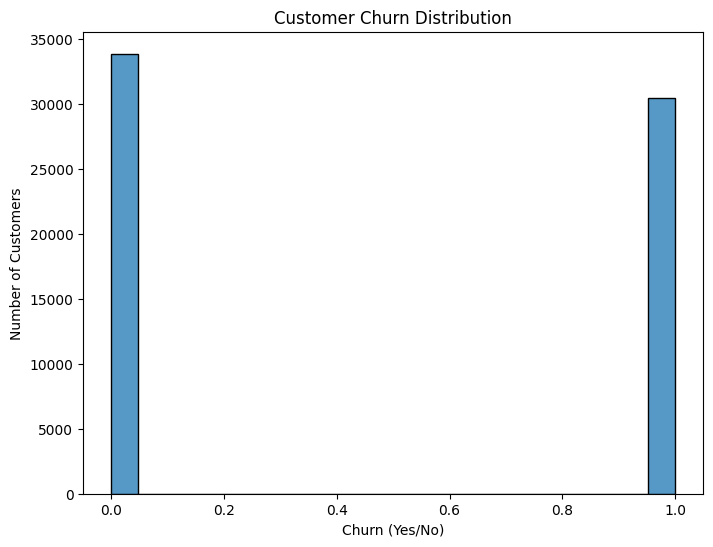

In [ ]:
# prompt: histogram in customer churn diatribution

import matplotlib.pyplot as plt
# Histogram of Customer Churn Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Churn'], kde=False)
plt.title('Customer Churn Distribution')
plt.xlabel('Churn (Yes/No)')
plt.ylabel('Number of Customers')
plt.show()


   Age  Gender Subscription Type
0   22  Female             Basic
1   41  Female          Standard
2   47    Male           Premium
3   35    Male           Premium
4   53  Female          Standard


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2313 (\N{DEVANAGARI LETTER U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/py

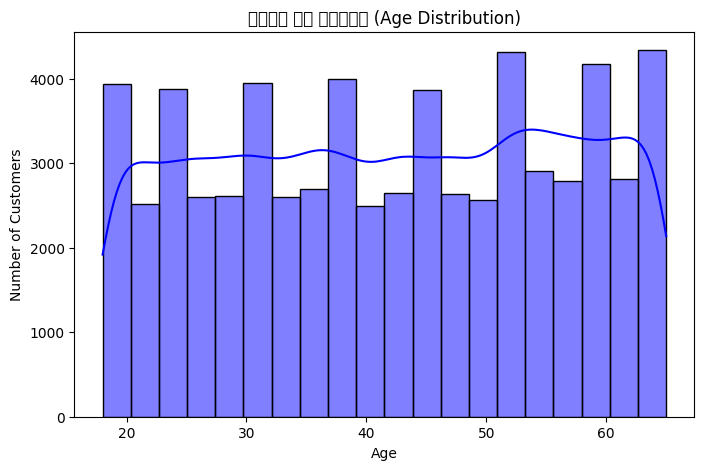

<ipython-input-10-50bc8d664e54>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='coolwarm')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2354 (\N{DEVANAGARI LETTER LA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2367 (\N{DEVANAGARI VOWEL SIGN I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing fr

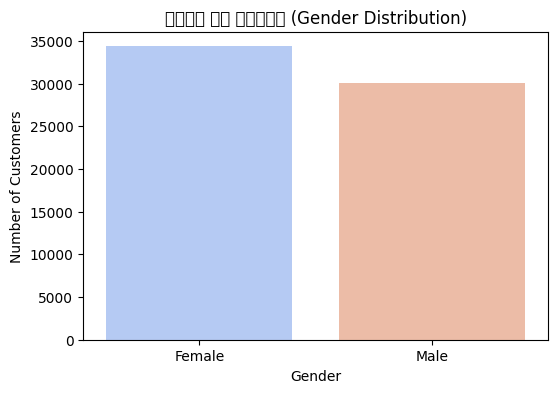

<ipython-input-10-50bc8d664e54>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Subscription Type', data=df, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2342 (\N{DEVANAGARI LETTER DA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missi

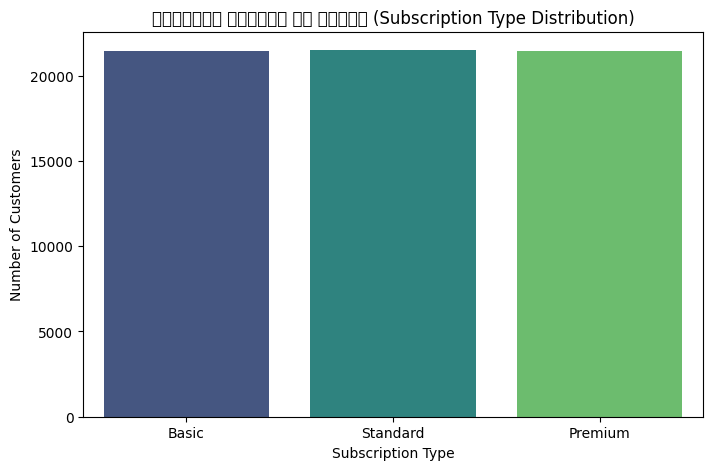

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 CSV फ़ाइल लोड करें (अपनी फ़ाइल का सही पथ दें)
df = pd.read_csv("/content/customer_churn_dataset-testing-master.csv.zip")

# 📌 केवल व्यक्तिगत जानकारी के कॉलम चुनें
personal_info = df[['Age', 'Gender', 'Subscription Type']]

# 📌 डेटा का अवलोकन करें
print(personal_info.head())

# 🔹 उम्र (Age) का वितरण ग्राफ
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title("उम्र का वितरण (Age Distribution)")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

# 🔹 लिंग (Gender) का वितरण ग्राफ
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='coolwarm')
plt.title("लिंग का वितरण (Gender Distribution)")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.show()

# 🔹 सदस्यता प्रकार (Subscription Type) का ग्राफ
plt.figure(figsize=(8, 5))
sns.countplot(x='Subscription Type', data=df, palette='viridis')
plt.title("सदस्यता प्रकार का वितरण (Subscription Type Distribution)")
plt.xlabel("Subscription Type")
plt.ylabel("Number of Customers")
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 🔹  (Sample Data)
data = {
    "Age": [25, 34, 45, 29, 50],
    "Gender": ["Male", "Female", "Male", "Female", "Male"],
    "Subscription Type": ["Basic", "Premium", "Standard", "Basic", "Premium"]
}

df = pd.DataFrame(data)

# 🔹 श्रेणीबद्ध (Categorical) डेटा को संख्यात्मक (Numerical) में बदलना
label_encoders = {}

for column in ["Gender", "Subscription Type"]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # भविष्य में उपयोग के लिए एन्कोडर सहेजें

# 🔹 परिवर्तित डेटा दिखाएं
print(df)


   Age  Gender  Subscription Type
0   25       1                  0
1   34       0                  1
2   45       1                  2
3   29       0                  0
4   50       1                  1


<ipython-input-16-acf3f84dfffe>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="viridis")


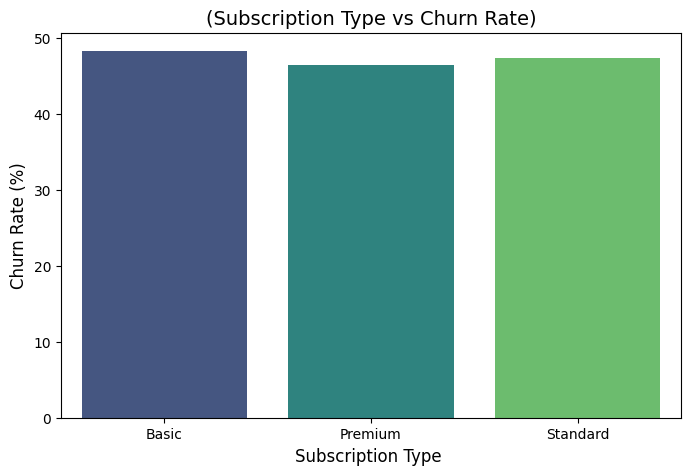

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Load Dataset
df = pd.read_csv("/content/customer_churn_dataset-testing-master.csv.zip")

# 🔹 Grouping Data: Subscription Type vs Churn Rate
churn_rate = df.groupby("Subscription Type")["Churn"].mean() * 100

# 🔹 Visualization (Bar Plot)
plt.figure(figsize=(8, 5))
sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="viridis")

# 🔹 Labels & Title
plt.xlabel("Subscription Type ", fontsize=12)
plt.ylabel("Churn Rate (%)", fontsize=12)
plt.title("(Subscription Type vs Churn Rate)", fontsize=14)
plt.show()


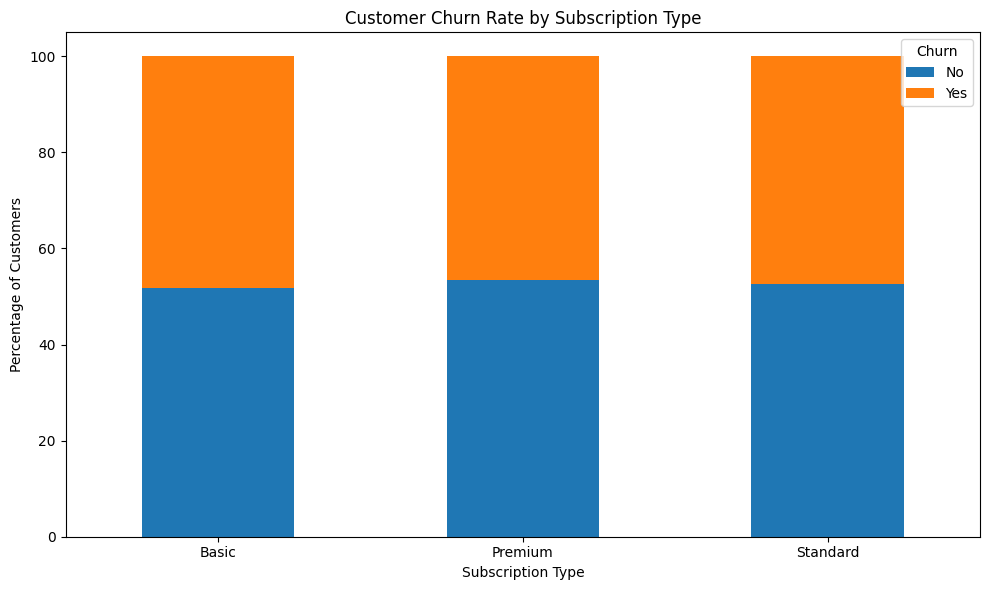

<ipython-input-1-c5edaca46ec4>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_age = df.groupby("Age_Group")["Churn"].value_counts(normalize=True).unstack() * 100


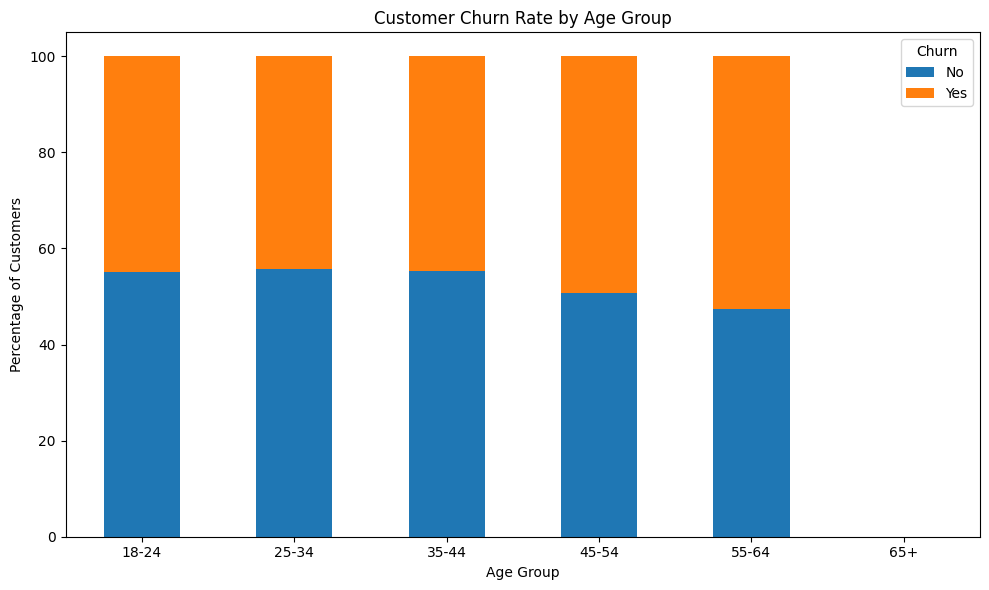

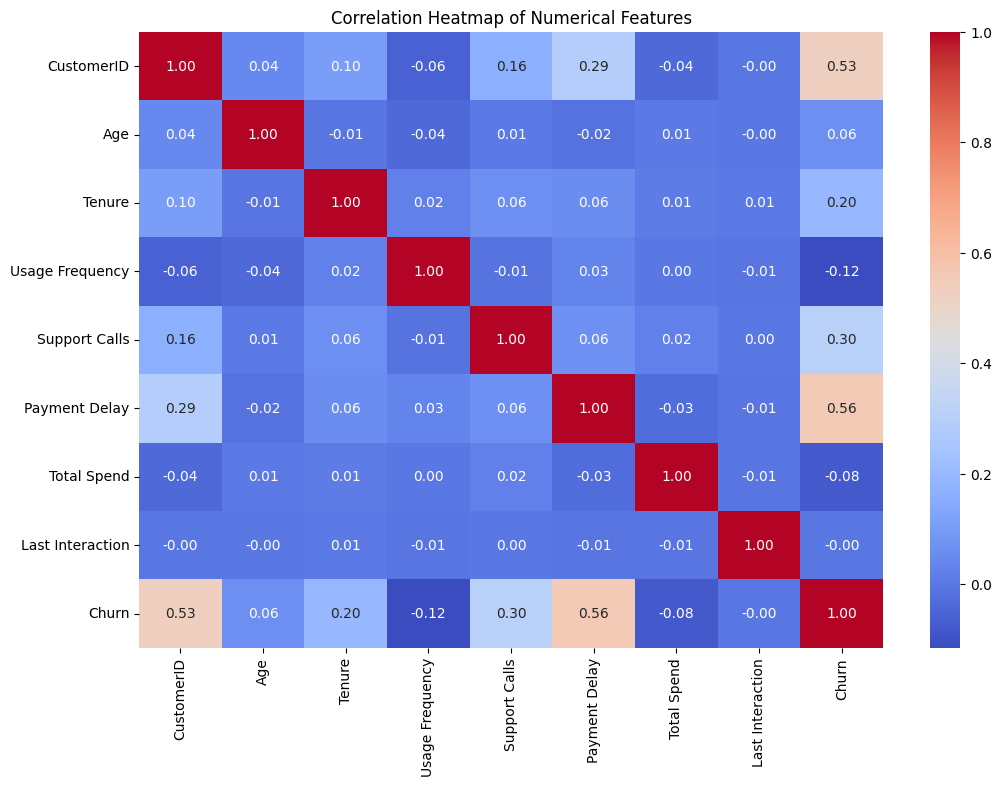

Churn           0          1
Gender                      
Female  44.950950  55.049050
Male    61.420339  38.579661


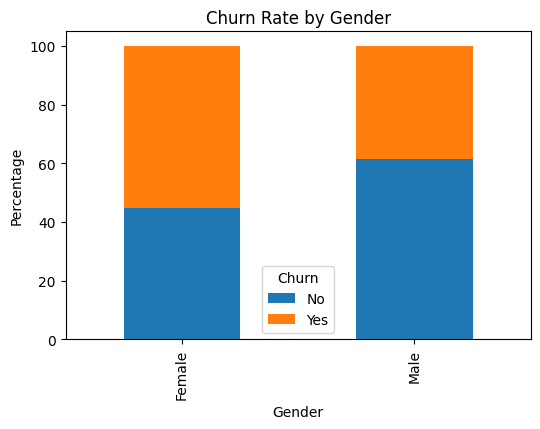

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it's in the same directory or provide the correct path)
df = pd.read_csv("/content/customer_churn_dataset-testing-master.csv.zip")

# 1. Customer Churn Analysis by Subscription Type:
churn_rate_by_subscription = df.groupby("Subscription Type")["Churn"].value_counts(normalize=True).unstack() * 100
churn_rate_by_subscription.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Customer Churn Rate by Subscription Type')
plt.ylabel('Percentage of Customers')
plt.xlabel('Subscription Type')
plt.xticks(rotation=0) #for better readability
plt.legend(title='Churn', labels=['No', 'Yes']) # Add legend
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


# 2. Customer Churn Analysis by Age Group:
# Create age groups (example bins, adjust as needed)
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 100], labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'])

churn_rate_by_age = df.groupby("Age_Group")["Churn"].value_counts(normalize=True).unstack() * 100
churn_rate_by_age.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Customer Churn Rate by Age Group')
plt.ylabel('Percentage of Customers')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()



# 3. Churn Correlation with Numerical Features:
numerical_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Further analysis can be done on the correlation matrix to find potential drivers for churn.


# 4. Gender and Churn:
gender_churn = df.groupby("Gender")["Churn"].value_counts(normalize=True).unstack() * 100
print(gender_churn)  # Print the actual values for comparison.
gender_churn.plot(kind='bar', stacked=True, figsize=(6,4))
plt.title("Churn Rate by Gender")
plt.ylabel("Percentage")
plt.xlabel("Gender")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

#  These visualizations provide clear insights into which customer segments are most likely to churn and why, enabling targeted retention strategies.



In [ ]:
# prompt: label encoding
# Assuming 'df' is your DataFrame and it already contains the 'Gender' and 'Subscription Type' columns.
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder objects
le_gender = LabelEncoder()
le_subscription = LabelEncoder()

# Fit and transform the categorical columns
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Subscription Type'] = le_subscription.fit_transform(df['Subscription Type'])

# Now your 'Gender' and 'Subscription Type' columns are numerically encoded.
# You can access the mapping using le_gender.classes_ and le_subscription.classes_

print(df[['Gender', 'Subscription Type']].head())

   Gender  Subscription Type
0       0                  0
1       0                  2
2       1                  1
3       1                  1
4       0                  2


In [ ]:
# prompt: models show and high accuracy check this model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# ... (rest of your imports)

# Load the dataset
df = pd.read_csv("/content/customer_churn_dataset-testing-master.csv.zip")

# Data Preprocessing (Example: Handling missing values, encoding categorical features)
# ... (Your existing preprocessing code)

# Feature Selection (Select relevant features for your model)
features = ['Age', 'Gender', 'Subscription Type',  # Add other relevant features
            # ...
           ]
X = df[features]
y = df['Churn'] # Assuming 'Churn' is your target variable

# ----> Apply Label Encoding to categorical features before splitting the data
for column in ['Gender', 'Subscription Type']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Training (Example: RandomForestClassifier)
model = RandomForestClassifier(n_estimators=100, random_state=42) # You can tune hyperparameters
model.fit(X_train, y_train)


# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# ... (rest of your code)

<ipython-input-7-5fdfbcadcbb5>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])
<ipython-input-7-5fdfbcadcbb5>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = le.fit_transform(X[column])


Accuracy: 0.5707184466019417


In [ ]:
# prompt: train the model and Evaluate the models

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))


Accuracy: 0.5707184466019417
              precision    recall  f1-score   support

           0       0.59      0.60      0.59      6793
           1       0.55      0.54      0.54      6082

    accuracy                           0.57     12875
   macro avg       0.57      0.57      0.57     12875
weighted avg       0.57      0.57      0.57     12875

[[4049 2744]
 [2783 3299]]


In [ ]:
# prompt: #  •Logistic Regression
# #  •Decision Tree
# #  •Random Forest

# ... (Your existing code)

# Model Training (Logistic Regression)
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(classification_report(y_test, y_pred_lr))


# Model Training (Decision Tree)
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(classification_report(y_test, y_pred_dt))


Logistic Regression Accuracy: 0.5722718446601942
              precision    recall  f1-score   support

           0       0.60      0.55      0.58      6793
           1       0.54      0.59      0.57      6082

    accuracy                           0.57     12875
   macro avg       0.57      0.57      0.57     12875
weighted avg       0.57      0.57      0.57     12875

Decision Tree Accuracy: 0.5701747572815534
              precision    recall  f1-score   support

           0       0.59      0.60      0.60      6793
           1       0.55      0.54      0.54      6082

    accuracy                           0.57     12875
   macro avg       0.57      0.57      0.57     12875
weighted avg       0.57      0.57      0.57     12875



In [ ]:
# prompt:  Choosing Models
#  ➢ What models did we try?
#  •Logistic Regression
#  •Decision Tree
#  •Random Forest

# Model Training (Logistic Regression)
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(classification_report(y_test, y_pred_lr))


# Model Training (Decision Tree)
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(classification_report(y_test, y_pred_dt))


Logistic Regression Accuracy: 0.5722718446601942
              precision    recall  f1-score   support

           0       0.60      0.55      0.58      6793
           1       0.54      0.59      0.57      6082

    accuracy                           0.57     12875
   macro avg       0.57      0.57      0.57     12875
weighted avg       0.57      0.57      0.57     12875

Decision Tree Accuracy: 0.5701747572815534
              precision    recall  f1-score   support

           0       0.59      0.60      0.60      6793
           1       0.55      0.54      0.54      6082

    accuracy                           0.57     12875
   macro avg       0.57      0.57      0.57     12875
weighted avg       0.57      0.57      0.57     12875



In [ ]:
# prompt:  Model Training & Testing

# Assuming X and y are already defined and preprocessed as in the previous code.

# Further Model Training and Evaluation (Example with additional models)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Model Training (Support Vector Machine)
model_svm = SVC(random_state=42)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")
print(classification_report(y_test, y_pred_svm))


# Model Training (K-Nearest Neighbors)
model_knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")
print(classification_report(y_test, y_pred_knn))


SVM Accuracy: 0.5741359223300971
              precision    recall  f1-score   support

           0       0.61      0.54      0.57      6793
           1       0.54      0.61      0.58      6082

    accuracy                           0.57     12875
   macro avg       0.58      0.58      0.57     12875
weighted avg       0.58      0.57      0.57     12875

KNN Accuracy: 0.5301747572815534
              precision    recall  f1-score   support

           0       0.56      0.54      0.55      6793
           1       0.50      0.52      0.51      6082

    accuracy                           0.53     12875
   macro avg       0.53      0.53      0.53     12875
weighted avg       0.53      0.53      0.53     12875

